FraudDetection

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r'C:\Users\sajid\Downloads\fraud_dataset_example.csv\fraud_dataset_example.csv')
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0,0


In [4]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
data.isFlaggedFraud.value_counts()

isFlaggedFraud
0    101613
Name: count, dtype: int64

In [6]:
data=data.drop(columns=['isFlaggedFraud'])

In [7]:
data.shape

(101613, 10)

In [8]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

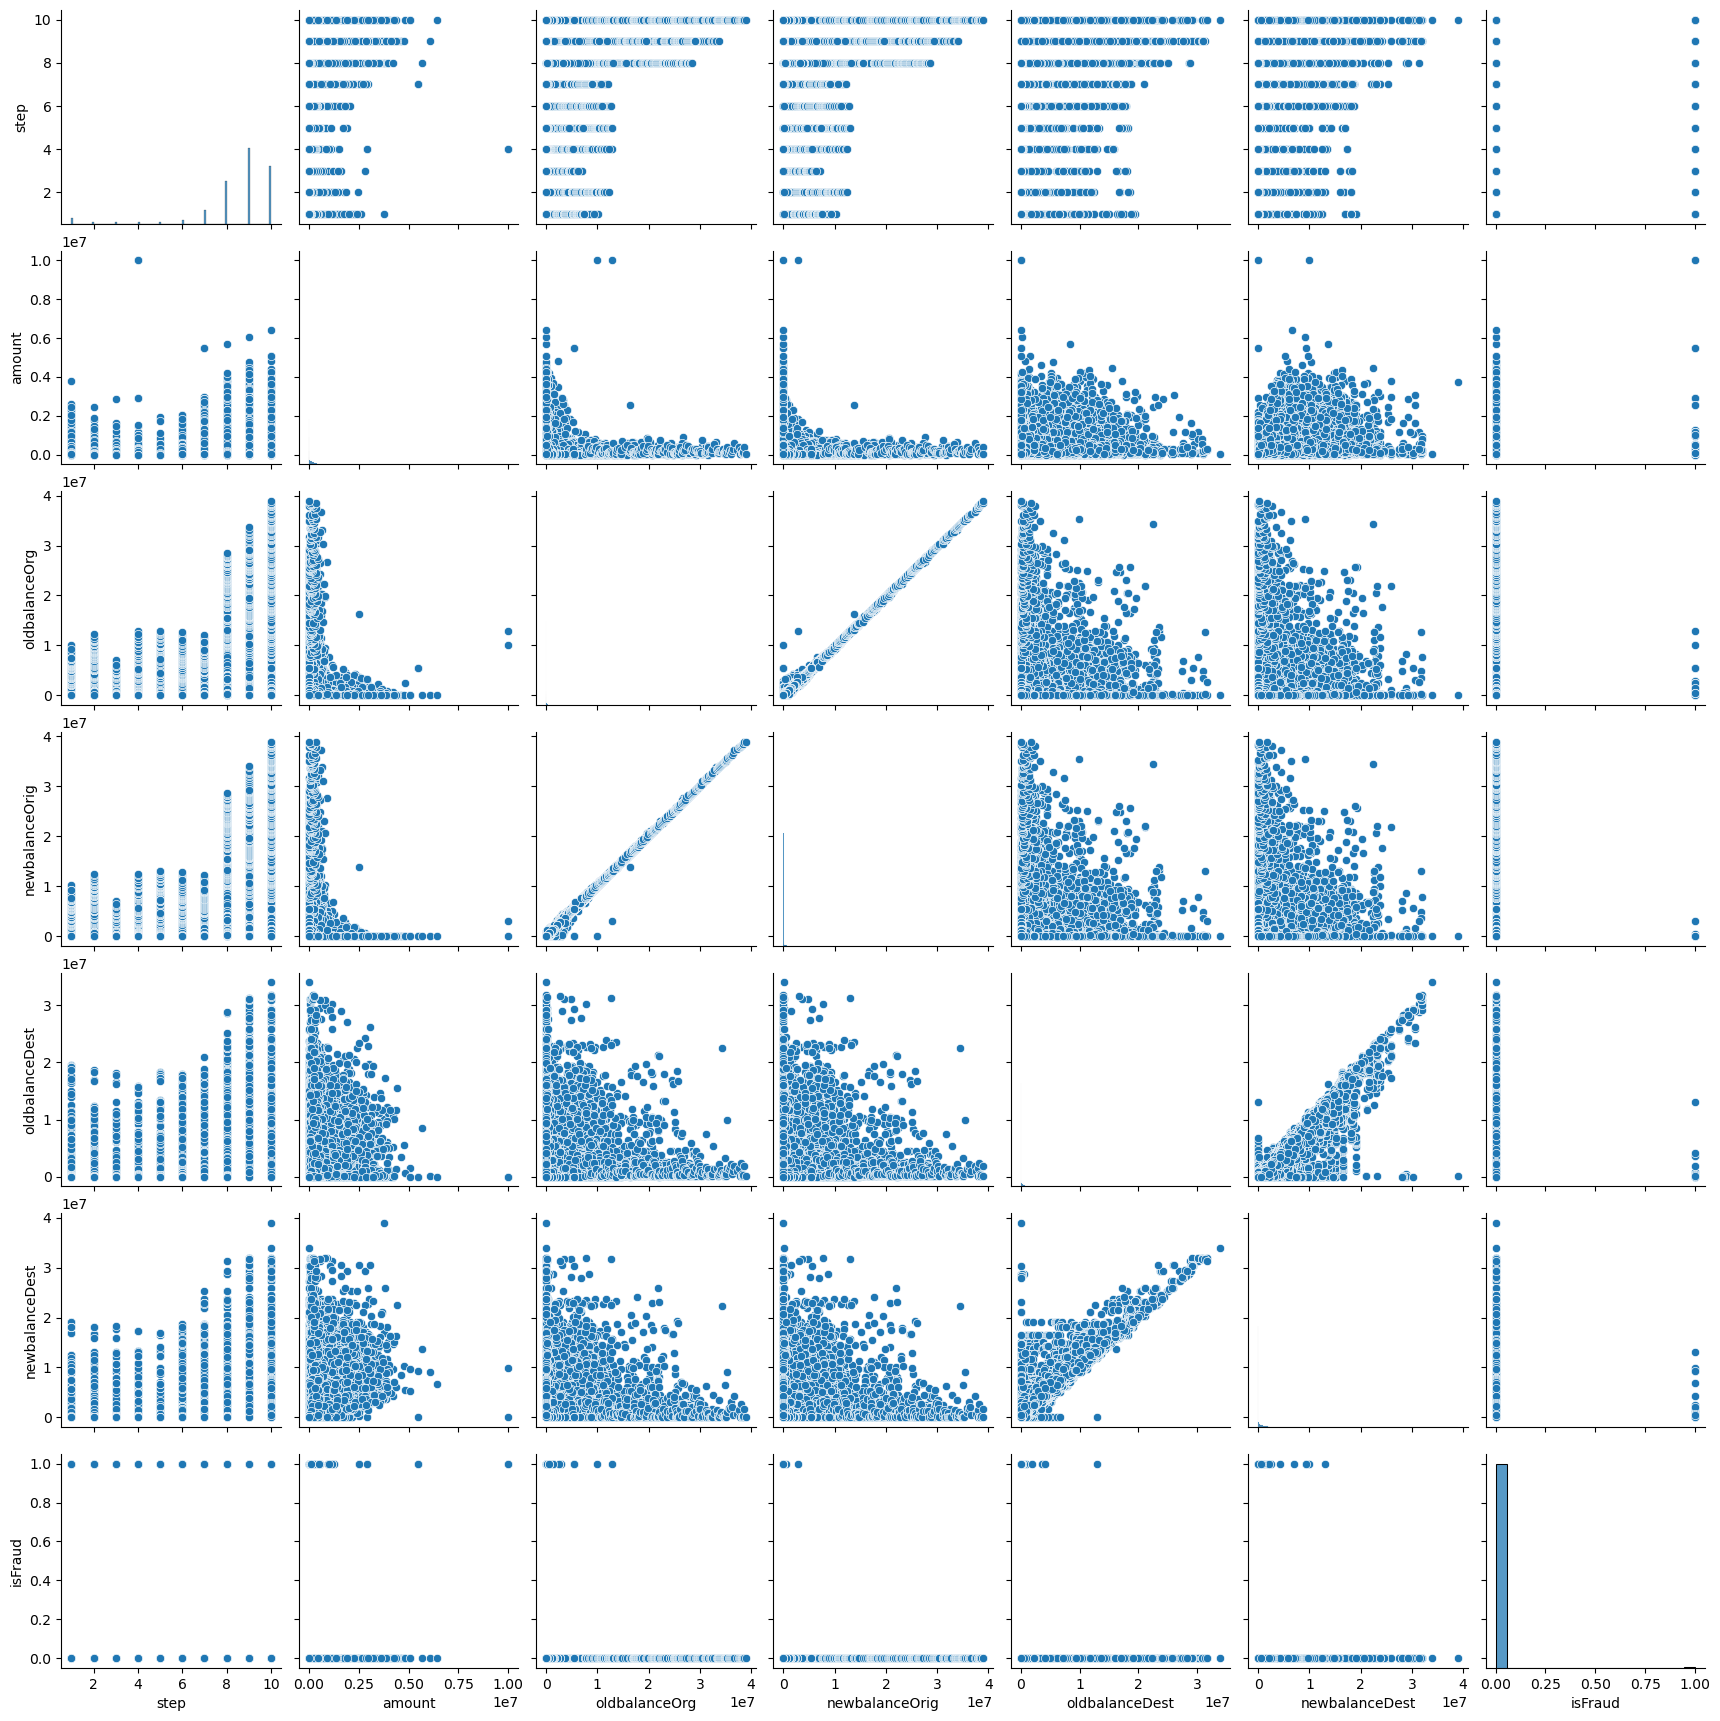

In [9]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Suppress specific warnings, e.g., FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

sns.pairplot(data)
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['type']=encoder.fit_transform(data['type'])
data['nameOrig']=encoder.fit_transform(data['nameOrig'])
data['nameDest']=encoder.fit_transform(data['nameDest'])

In [11]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,12031,170136.00,160296.36,32431,0.00,0.00,0
1,1,3,1864.28,34878,21249.00,19384.72,33746,0.00,0.00,0
2,1,4,181.00,15860,181.00,0.00,9437,0.00,0.00,1
3,1,1,181.00,93247,181.00,0.00,8393,21182.00,0.00,1
4,1,3,11668.14,54896,41554.00,29885.86,16923,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
101608,10,3,7477.02,75816,785.00,0.00,42340,0.00,0.00,0
101609,10,1,282252.35,57888,220339.29,0.00,1077,95156.01,91286.97,0
101610,10,3,17289.01,91466,0.00,0.00,38337,0.00,0.00,0
101611,10,4,1347146.45,16397,1605.00,0.00,3975,541639.43,2186953.43,0


In [12]:
x=data.drop(columns=['isFraud'])
x

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,3,9839.64,12031,170136.00,160296.36,32431,0.00,0.00
1,1,3,1864.28,34878,21249.00,19384.72,33746,0.00,0.00
2,1,4,181.00,15860,181.00,0.00,9437,0.00,0.00
3,1,1,181.00,93247,181.00,0.00,8393,21182.00,0.00
4,1,3,11668.14,54896,41554.00,29885.86,16923,0.00,0.00
...,...,...,...,...,...,...,...,...,...
101608,10,3,7477.02,75816,785.00,0.00,42340,0.00,0.00
101609,10,1,282252.35,57888,220339.29,0.00,1077,95156.01,91286.97
101610,10,3,17289.01,91466,0.00,0.00,38337,0.00,0.00
101611,10,4,1347146.45,16397,1605.00,0.00,3975,541639.43,2186953.43


In [13]:
y=data['isFraud']
y

0         0
1         0
2         1
3         1
4         0
         ..
101608    0
101609    0
101610    0
101611    0
101612    0
Name: isFraud, Length: 101613, dtype: int64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.00000000e+00, 7.50000000e-01, 9.83932031e-04, ...,
        6.20344689e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.50000000e-01, 1.86396006e-04, ...,
        6.45498192e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 1.80680006e-05, ...,
        1.80512252e-01, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 7.50000000e-01, 1.72886906e-03, ...,
        7.33315480e-01, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.34714617e-01, ...,
        7.60343541e-02, 1.59264788e-02, 5.61531440e-02],
       [1.00000000e+00, 2.50000000e-01, 4.69538905e-02, ...,
        4.70169667e-02, 0.00000000e+00, 1.20560879e-02]])

In [15]:
#Train-Test-Split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)
smote = SMOTE(sampling_strategy='auto',random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)


In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced',random_state=42)
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [17]:
predictrf=rf.predict(x_test)
predictrf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,accuracy_score
mae = mean_absolute_error(y_test, predictrf)
mse = mean_squared_error(y_test, predictrf)
print("Random Forest Classifier")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Accuracy Score: ",accuracy_score(y_test,predictrf))


Random Forest Classifier
Mean Absolute Error (MAE): 0.0009841066771638046
Mean Squared Error (MSE): 0.0009841066771638046
Accuracy Score:  0.9990158933228362


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20302
           1       0.52      0.62      0.57        21

    accuracy                           1.00     20323
   macro avg       0.76      0.81      0.78     20323
weighted avg       1.00      1.00      1.00     20323



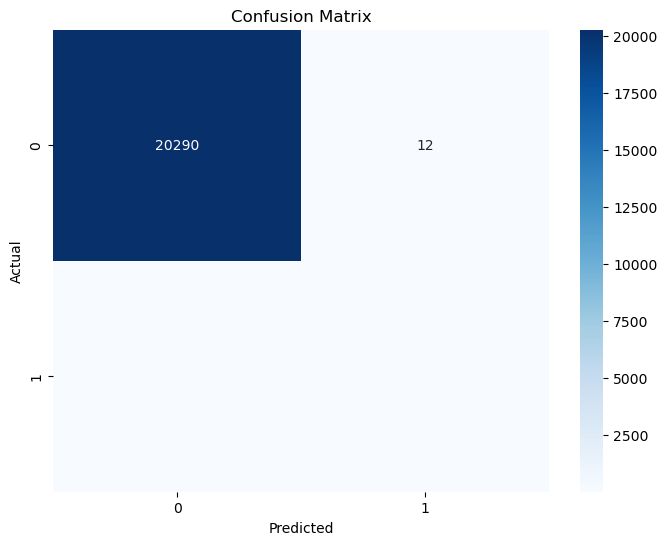

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
print(classification_report(y_test, predictrf))
conf_matrix = confusion_matrix(y_test, predictrf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


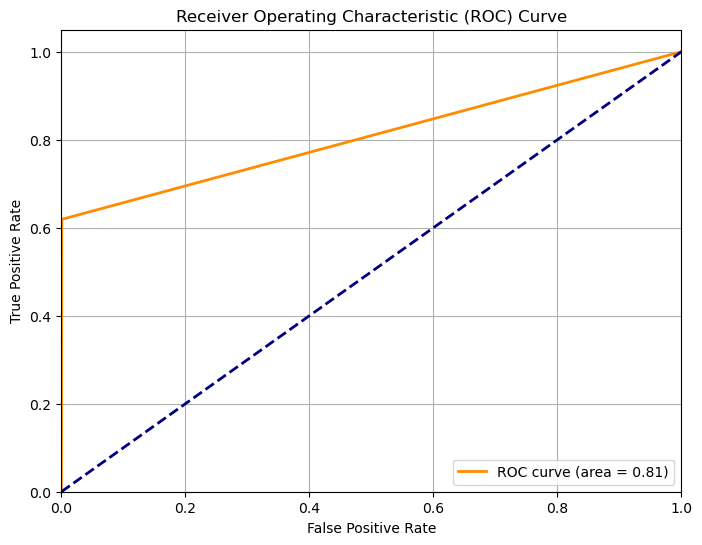

In [20]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, predictrf)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [22]:
predictlogr=logr.predict(x_test)
predictlogr

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
print("Logistic Regression")
print("Accuracy Score: ",accuracy_score(y_test,predictlogr))

Logistic Regression
Accuracy Score:  0.8521871770899966


              precision    recall  f1-score   support

           0       1.00      0.85      0.92     20302
           1       0.01      0.90      0.01        21

    accuracy                           0.85     20323
   macro avg       0.50      0.88      0.47     20323
weighted avg       1.00      0.85      0.92     20323



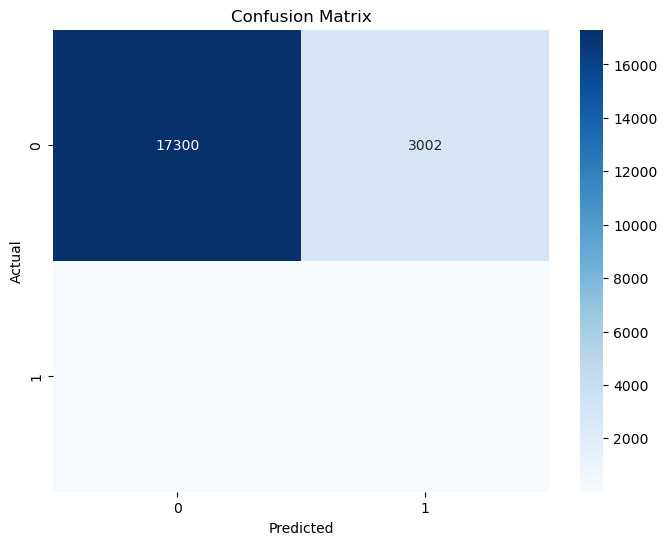

In [24]:
print(classification_report(y_test, predictlogr))
conf_matrix = confusion_matrix(y_test, predictlogr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [25]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(scale_pos_weight=len(y_train_sm) / sum(y_train_sm), random_state=42)
xgb_model.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [26]:
predictxg=xgb_model.predict(x_test)
print("XGBoost Classifier")
print("Accuracy Score: ",accuracy_score(y_test,predictxg))

XGBoost Classifier
Accuracy Score:  0.9982778133149633


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20302
           1       0.35      0.81      0.49        21

    accuracy                           1.00     20323
   macro avg       0.68      0.90      0.75     20323
weighted avg       1.00      1.00      1.00     20323



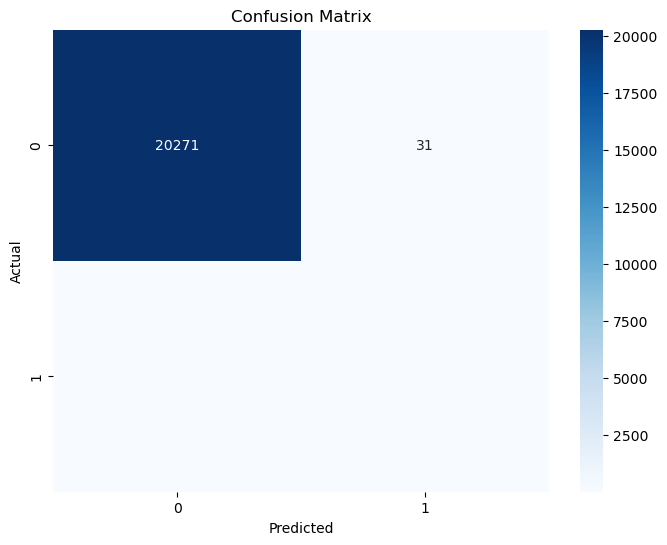

In [27]:
print(classification_report(y_test, predictxg))
conf_matrix = confusion_matrix(y_test, predictxg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Conclusion 

Random Forest Classifier gives Good results when compared to Logistic Regression and XGBoost Classifier.